In [282]:
import sys
import pandas as pd
import numpy as np
sys.path.append("..")
from data.data_handler import import_dataset
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from lineartree import LinearTreeRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import matplotlib.pyplot as plt
import pydot

## By Player and Year 2010 - 2018
per_year_df

In [299]:
per_year_df = pd.read_csv("../data/pgaTourData.csv")

# no points means no scores
per_year_df = per_year_df.dropna(subset=["Points", "Average Score"])

# commas to floats
per_year_df["Points"] = per_year_df["Points"].str.replace(',', '').astype(float)
per_year_df["Money"] = per_year_df["Money"].str.replace(',', '').str.replace("$", "").astype(float)
per_year_df["Rounds / Win"] = per_year_df["Rounds"] / per_year_df["Wins"]
per_year_df = per_year_df.set_index("Player Name")
per_year_df = per_year_df.fillna(0)
per_year_df

/var/folders/5_/2z9ny5950t57nyvwn68j6pg00000gn/T/ipykernel_54649/3962006539.py:8: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  per_year_df["Money"] = per_year_df["Money"].str.replace(',', '').str.replace("$", "").astype(float)


,Rounds,Fairway Percentage,Year,Avg Distance,gir,Average Putts,Average Scrambling,Average Score,Points,Wins,Top 10,Average SG Putts,Average SG Total,SG:OTT,SG:APR,SG:ARG,Money,Rounds / Win
Player Name,,,,,,,,,,,,,,,,,,
Henrik Stenson,60.0,75.19,2018,291.5,73.51,29.93,60.67,69.617,868.0,0.0,5.0,-0.207,1.153,0.427,0.960,-0.027,2680487.0,0.0
Ryan Armour,109.0,73.58,2018,283.5,68.22,29.31,60.13,70.758,1006.0,1.0,3.0,-0.058,0.337,-0.012,0.213,0.194,2485203.0,109.0
Chez Reavie,93.0,72.24,2018,286.5,68.67,29.12,62.27,70.432,1020.0,0.0,3.0,0.192,0.674,0.183,0.437,-0.137,2700018.0,0.0
Ryan Moore,78.0,71.94,2018,289.2,68.80,29.17,64.16,70.015,795.0,0.0,5.0,-0.271,0.941,0.406,0.532,0.273,1986608.0,0.0
Brian Stuard,103.0,71.44,2018,278.9,67.12,29.11,59.23,71.038,421.0,0.0,3.0,0.164,0.062,-0.227,0.099,0.026,1089763.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Phil Mickelson,76.0,52.66,2010,299.1,65.13,28.79,61.84,69.966,1629.0,1.0,5.0,-0.147,1.001,0.185,0.738,0.228,3821733.0,76.0
John Daly,63.0,52.21,2010,305.7,65.66,29.78,53.53,71.697,97.0,0.0,0.0,-0.653,-0.989,0.336,-0.374,-0.298,158587.0,0.0
Jimmy Walker,82.0,51.29,2010,292.9,65.88,29.14,58.46,70.953,554.0,0.0,2.0,0.252,0.093,-0.538,0.336,0.047,937987.0,0.0


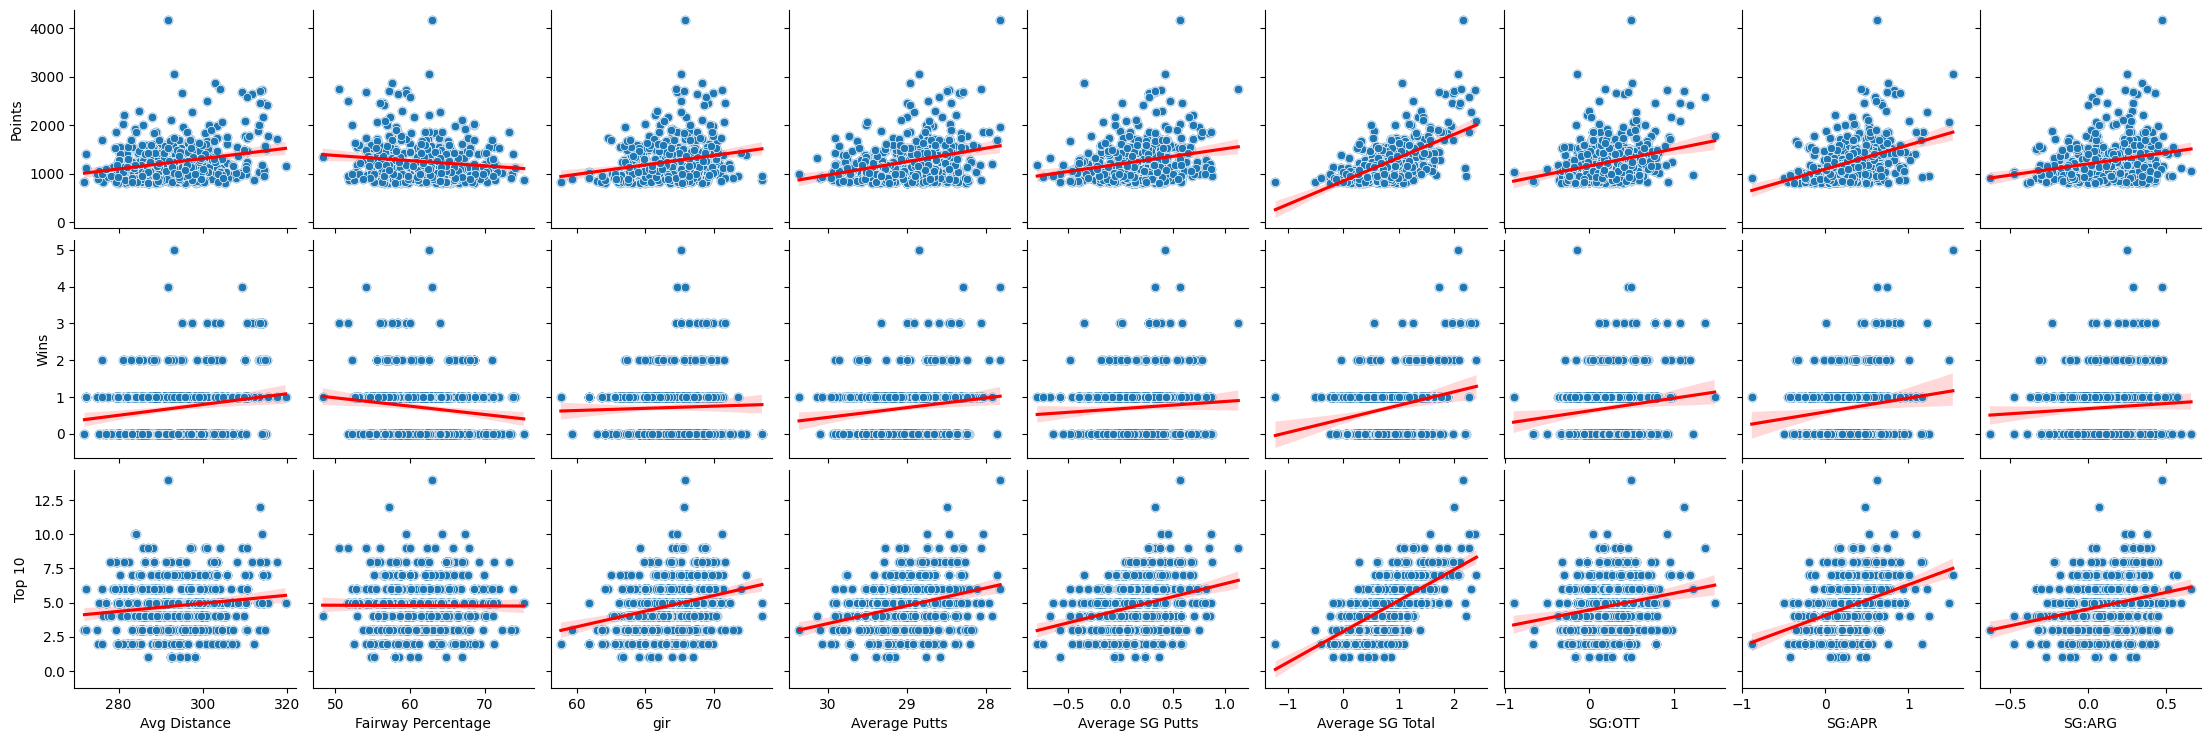

In [31]:
df_to_plot = per_year_df.drop(columns=["Rounds", "Average Scrambling", "Money", "Average Score"])
top_ten_percent  = df_to_plot["Points"].quantile(.75)

df_to_plot = df_to_plot[df_to_plot["Points"] >= top_ten_percent]

graph = sns.pairplot(df_to_plot.drop(columns=["Year",]), kind="reg", plot_kws={'line_kws':{'color':'red'}}, y_vars=["Points", "Wins", "Top 10"], x_vars=["Avg Distance", "Fairway Percentage", "gir", "Average Putts", "Average SG Putts", "Average SG Total", "SG:OTT", "SG:APR", "SG:ARG"])
# Flip x axis for Avg Putts since less putts is better
graph.axes[2][3].invert_xaxis()
graph.map(sns.scatterplot)


---

## Sum / Mean by Player 2010-2018
avg_2010_to_2018_df

In [295]:
avg_2010_to_2018_df = pd.read_csv("../data/pgaTourData.csv").drop(columns=["Year"])
avg_2010_to_2018_df["Money"] = avg_2010_to_2018_df["Money"].str.replace(',', '').str.replace("$", "").astype(float)
avg_2010_to_2018_df["Points"] = avg_2010_to_2018_df["Points"].str.replace(',', '').astype(float)
avg_2010_to_2018_df["Rounds / Win"] = avg_2010_to_2018_df["Rounds"] / avg_2010_to_2018_df["Wins"]

aggregations = {
    "Rounds" : sum,
    "Wins" : sum,
    "Top 10" : sum,
    "Points" : sum,
    "Money" : sum,
    "Fairway Percentage" : np.mean,
    "Avg Distance" : np.mean,
    "gir" : np.mean,
    "Average Putts" : np.mean,
    "Average Scrambling" : np.mean,
    "Average Score" : np.mean,
    "Average SG Putts" : np.mean,
    "Average SG Total" : np.mean,
    "SG:OTT" : np.mean,
    "SG:APR" : np.mean,
    "SG:ARG" : np.mean,
    "Rounds / Win" : np.mean
}

avg_2010_to_2018_df = avg_2010_to_2018_df.groupby(["Player Name"]).agg(aggregations).dropna(subset=["Points"])
avg_2010_to_2018_df

/var/folders/5_/2z9ny5950t57nyvwn68j6pg00000gn/T/ipykernel_54649/1399184993.py:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  avg_2010_to_2018_df["Money"] = avg_2010_to_2018_df["Money"].str.replace(',', '').str.replace("$", "").astype(float)


,Rounds,Wins,Top 10,Points,Money,Fairway Percentage,Avg Distance,gir,Average Putts,Average Scrambling,Average Score,Average SG Putts,Average SG Total,SG:OTT,SG:APR,SG:ARG,Rounds / Win
Player Name,,,,,,,,,,,,,,,,,
Aaron Baddeley,700.0,2.0,21.0,5103.0,10419470.0,53.427778,293.677778,61.945556,28.295556,60.074444,71.008444,0.473333,0.152444,-0.342667,-0.310333,0.333111,85.000
Aaron Watkins,46.0,0.0,1.0,126.0,217495.0,63.030000,277.100000,62.250000,28.750000,59.530000,71.770000,0.402000,-0.589000,-0.568000,-0.707000,0.285000,NaN
Aaron Wise,90.0,1.0,3.0,1086.0,3486407.0,63.330000,302.900000,68.810000,29.150000,56.280000,70.247000,0.238000,0.703000,0.410000,0.012000,0.042000,90.000
Abraham Ancer,149.0,0.0,4.0,736.0,1839506.0,64.530000,286.250000,64.150000,28.985000,59.680000,71.398000,-0.238500,-0.203500,0.150500,-0.133000,0.017500,NaN
Adam Hadwin,378.0,1.0,13.0,3207.0,7392920.0,64.375000,289.600000,66.387500,28.847500,59.680000,70.768250,0.319750,0.486250,0.075000,0.026250,0.043250,98.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Zach Johnson,803.0,5.0,42.0,10935.0,27540362.0,68.653333,282.144444,66.458889,28.727778,60.882222,70.107444,0.362222,0.896778,0.052778,0.322222,0.165222,81.875
Zack Miller,86.0,0.0,1.0,295.0,564453.0,57.060000,299.500000,61.790000,29.450000,54.260000,71.890000,-0.483000,-1.051000,0.057000,-0.612000,-0.012000,NaN
Zack Sucher,0.0,0.0,0.0,88.0,120749.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


-----

# Only golfers who won on tour

In [48]:
power_winners_df = avg_2010_to_2018_df
power_winners_df = power_winners_df[(power_winners_df["Wins"] != 0) & (power_winners_df["Rounds"] != 0) & (power_winners_df["Rounds"] > 100)]
power_winners_df["Rounds / Win"] = avg_2010_to_2018_df["Rounds"] / avg_2010_to_2018_df["Wins"]

power_winners_df.sort_values(by="Rounds / Win", ascending=True).head(15)

/var/folders/5_/2z9ny5950t57nyvwn68j6pg00000gn/T/ipykernel_54649/998216901.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  power_winners_df["Rounds / Win"] = avg_2010_to_2018_df["Rounds"] / avg_2010_to_2018_df["Wins"]


,Rounds,Wins,Top 10,Points,Money,Fairway Percentage,Avg Distance,gir,Average Putts,Average Scrambling,Average Score,Average SG Putts,Average SG Total,SG:OTT,SG:APR,SG:ARG,Rounds / Win
Player Name,,,,,,,,,,,,,,,,,
Tiger Woods,198.0,8.0,23.0,7499.0,22642314.0,61.926667,298.066667,67.523333,28.750000,62.443333,69.066000,0.343667,1.990000,0.157333,1.213333,0.275333,24.750000
Rory McIlroy,420.0,9.0,49.0,11049.0,38179146.0,58.417143,309.428571,67.050000,28.817143,59.765714,69.545286,-0.062429,1.525143,0.959571,0.476143,0.132857,46.666667
Justin Thomas,382.0,8.0,29.0,7842.0,25021311.0,56.170000,306.400000,67.662500,28.635000,60.030000,69.788250,0.115250,1.211750,0.310250,0.615250,0.192750,47.750000
Dustin Johnson,670.0,13.0,64.0,16247.0,51453494.0,56.551111,312.155556,67.991111,28.904444,58.097778,69.646778,0.065444,1.443556,0.835667,0.541333,-0.009222,51.538462
Jordan Spieth,521.0,10.0,47.0,12878.0,38018072.0,61.445000,293.516667,66.873333,28.268333,62.633333,69.470333,0.359000,1.499000,0.355500,0.472333,0.301333,52.100000
Bubba Watson,686.0,12.0,40.0,13773.0,36804576.0,57.793333,311.411111,68.377778,29.464444,55.940000,70.185444,-0.114000,0.998778,0.965444,0.235667,-0.092333,57.166667
Martin Kaymer,126.0,2.0,7.0,2447.0,6417231.0,61.315000,291.650000,64.715000,29.500000,53.010000,70.513500,0.013000,0.189500,0.340500,0.150000,-0.314500,63.000000
Steve Stricker,320.0,5.0,30.0,8139.0,20471270.0,65.632000,283.740000,67.360000,28.470000,64.082000,69.555200,0.538200,1.551400,0.045000,0.554600,0.414000,64.000000
Jason Day,652.0,10.0,48.0,12746.0,40938895.0,55.573333,304.900000,65.573333,28.471111,62.374444,69.742444,0.513333,1.302333,0.330111,0.120889,0.319000,65.200000


(4, 9)


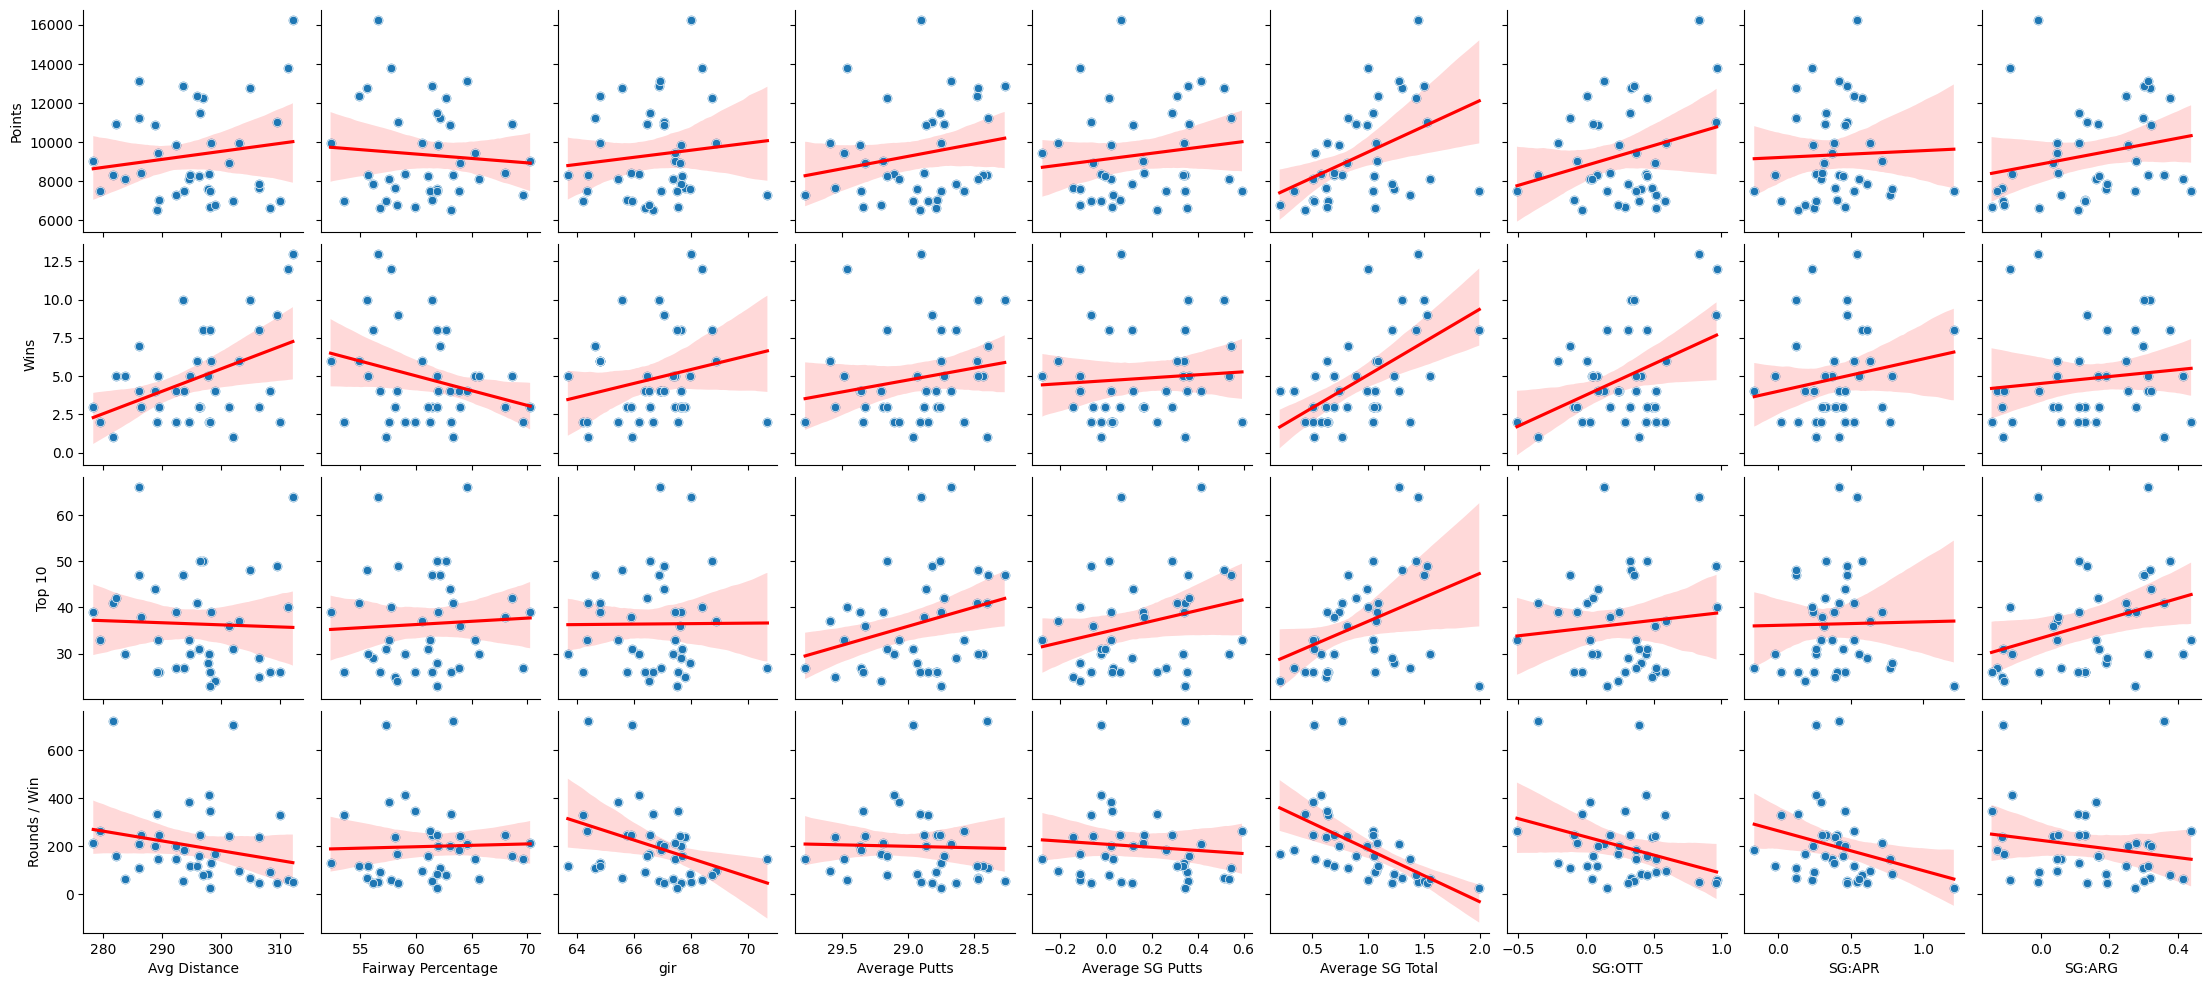

In [285]:
df_to_plot = power_winners_df.drop(columns=["Rounds", "Average Score"])
top_ten_percent  = df_to_plot["Points"].quantile(.75)

df_to_plot = df_to_plot[df_to_plot["Points"] >= top_ten_percent]

graph = sns.pairplot(df_to_plot, kind="reg", plot_kws={'line_kws':{'color':'red'}}, y_vars=["Points", "Wins", "Top 10", "Rounds / Win"], x_vars=["Avg Distance", "Fairway Percentage", "gir", "Average Putts", "Average SG Putts", "Average SG Total", "SG:OTT", "SG:APR", "SG:ARG"])
print(graph.axes.shape)

# Flip x axis for Avg Putts since less putts is better
graph.axes[2][3].invert_xaxis()

graph.map(sns.scatterplot)

-----

## Top 15 by Wins 
"What does it take to win consistently"

In [35]:
avg_2010_to_2018_df.sort_values(by="Wins", ascending=False).head(15)

,Rounds,Wins,Top 10,Points,Money,Fairway Percentage,Avg Distance,gir,Average Putts,Average Scrambling,Average Score,Average SG Putts,Average SG Total,SG:OTT,SG:APR,SG:ARG
Player Name,,,,,,,,,,,,,,,,
Dustin Johnson,670.0,13.0,64.0,16247.0,51453494.0,56.551111,312.155556,67.991111,28.904444,58.097778,69.646778,0.065444,1.443556,0.835667,0.541333,-0.009222
Bubba Watson,686.0,12.0,40.0,13773.0,36804576.0,57.793333,311.411111,68.377778,29.464444,55.940000,70.185444,-0.114000,0.998778,0.965444,0.235667,-0.092333
Jason Day,652.0,10.0,48.0,12746.0,40938895.0,55.573333,304.900000,65.573333,28.471111,62.374444,69.742444,0.513333,1.302333,0.330111,0.120889,0.319000
Jordan Spieth,521.0,10.0,47.0,12878.0,38018072.0,61.445000,293.516667,66.873333,28.268333,62.633333,69.470333,0.359000,1.499000,0.355500,0.472333,0.301333
Rory McIlroy,420.0,9.0,49.0,11049.0,38179146.0,58.417143,309.428571,67.050000,28.817143,59.765714,69.545286,-0.062429,1.525143,0.959571,0.476143,0.132857
Justin Thomas,382.0,8.0,29.0,7842.0,25021311.0,56.170000,306.400000,67.662500,28.635000,60.030000,69.788250,0.115250,1.211750,0.310250,0.615250,0.192750
Justin Rose,628.0,8.0,50.0,12267.0,39292625.0,62.668889,296.922222,68.725556,29.156667,60.600000,69.688778,0.014111,1.427667,0.453111,0.579000,0.377333
Tiger Woods,198.0,8.0,23.0,7499.0,22642314.0,61.926667,298.066667,67.523333,28.750000,62.443333,69.066000,0.343667,1.990000,0.157333,1.213333,0.275333
Brandt Snedeker,751.0,7.0,47.0,11258.0,28883076.0,62.166667,286.088889,64.634444,28.396667,61.688889,70.134889,0.545667,0.823889,-0.117111,0.123000,0.296667


## Top 15 by Points
"What does it take to play consistently"

In [36]:
avg_2010_to_2018_df.sort_values(by="Points", ascending=False).head(15)

,Rounds,Wins,Top 10,Points,Money,Fairway Percentage,Avg Distance,gir,Average Putts,Average Scrambling,Average Score,Average SG Putts,Average SG Total,SG:OTT,SG:APR,SG:ARG
Player Name,,,,,,,,,,,,,,,,
Dustin Johnson,670.0,13.0,64.0,16247.0,51453494.0,56.551111,312.155556,67.991111,28.904444,58.097778,69.646778,0.065444,1.443556,0.835667,0.541333,-0.009222
Bubba Watson,686.0,12.0,40.0,13773.0,36804576.0,57.793333,311.411111,68.377778,29.464444,55.940000,70.185444,-0.114000,0.998778,0.965444,0.235667,-0.092333
Matt Kuchar,841.0,4.0,66.0,13110.0,35956219.0,64.614444,286.155556,66.917778,28.678889,63.405556,69.747333,0.414556,1.275889,0.136778,0.419889,0.313444
Jordan Spieth,521.0,10.0,47.0,12878.0,38018072.0,61.445000,293.516667,66.873333,28.268333,62.633333,69.470333,0.359000,1.499000,0.355500,0.472333,0.301333
Jason Day,652.0,10.0,48.0,12746.0,40938895.0,55.573333,304.900000,65.573333,28.471111,62.374444,69.742444,0.513333,1.302333,0.330111,0.120889,0.319000
Phil Mickelson,703.0,6.0,41.0,12351.0,32317468.0,54.915556,295.855556,64.827778,28.477778,60.860000,70.037778,0.310444,1.092556,0.009778,0.524444,0.248333
Justin Rose,628.0,8.0,50.0,12267.0,39292625.0,62.668889,296.922222,68.725556,29.156667,60.600000,69.688778,0.014111,1.427667,0.453111,0.579000,0.377333
Rickie Fowler,740.0,3.0,50.0,11487.0,33436368.0,61.878889,296.444444,66.558889,28.760000,60.242222,70.032444,0.289222,1.044000,0.325667,0.330111,0.111556
Brandt Snedeker,751.0,7.0,47.0,11258.0,28883076.0,62.166667,286.088889,64.634444,28.396667,61.688889,70.134889,0.545667,0.823889,-0.117111,0.123000,0.296667


## Higher positive slope means more important to winning 
Can see that Avg SG Total (Average Shots Gained Total) is most important followed by SG:APR (Shots Gained Approach) <br><br>

Shots Gained Total is simply how much better than the field you were so it makese sense this is by far the most important. Next and most interestingly, we see that shots gained approach, any shot hit 30 yrds or more from the green not counting tee shots, is the most impportant statistic.

(3, 9)


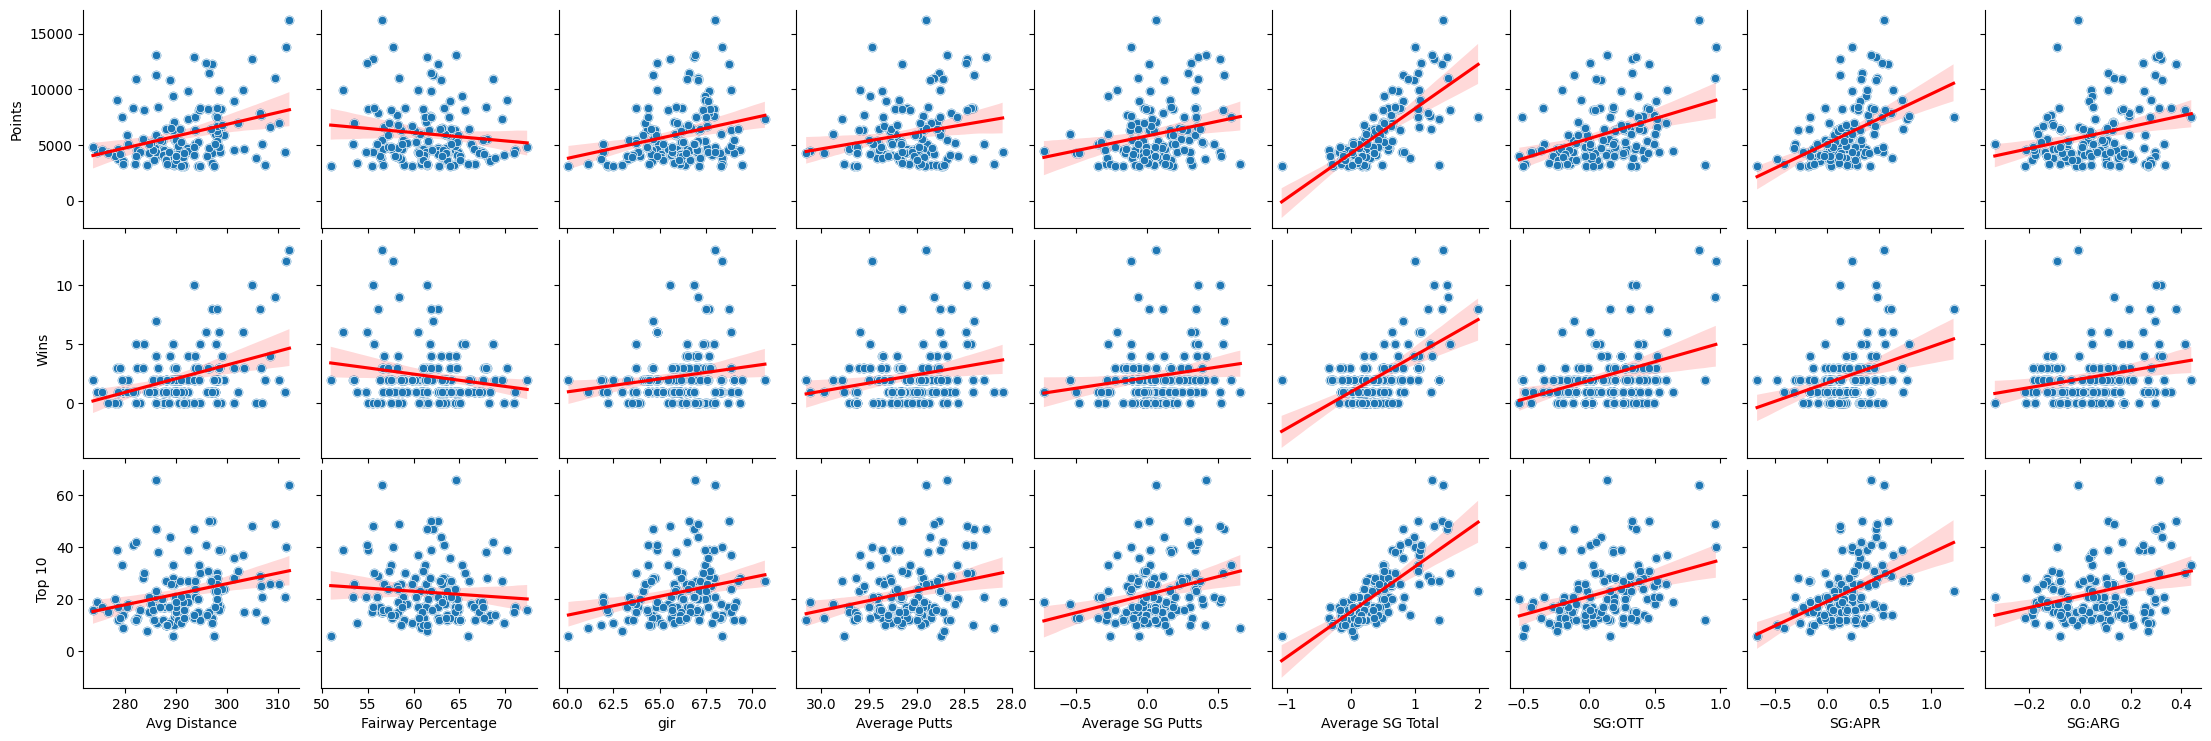

In [37]:
df_to_plot = avg_2010_to_2018_df.drop(columns=["Rounds", "Average Score"])
top_ten_percent  = df_to_plot["Points"].quantile(.75)

df_to_plot = df_to_plot[df_to_plot["Points"] >= top_ten_percent]

graph = sns.pairplot(df_to_plot, kind="reg", plot_kws={'line_kws':{'color':'red'}}, y_vars=["Points", "Wins", "Top 10"], x_vars=["Avg Distance", "Fairway Percentage", "gir", "Average Putts", "Average SG Putts", "Average SG Total", "SG:OTT", "SG:APR", "SG:ARG"])
print(graph.axes.shape)

# Flip x axis for Avg Putts since less putts is better
graph.axes[2][3].invert_xaxis()
graph.map(sns.scatterplot)


# Linear Trees

## Different dataframes for prediction

1. per_year_df: All golfers where one row represents **one year** for a given golfer from 2010-2018
2. avg_2010_to_2018_df: All golfers where one row represents an **aggregation** of a players data from 2010-2018
3. power_winners_df: Only **golfers with at least one win an over 100 rounds played** where one row represents an **aggregation** of a players data from 2010-2018

In [309]:
# Each player and each year
per_year_df.name = "per_year_df"

# All players as an aggregation 
avg_2010_to_2018_df.name = "avg_2010_to_2018_df"

# power winners
power_winners_df.name = "power_winners_df"

In [115]:
def plot_regression(ytest, ypred):
    fig, ax = plt.subplots()
    ax.scatter(ypred, ytest, edgecolors=(0, 0, 1))
    ax.plot([ytest.min(), ytest.max()], [ytest.min(), ytest.max()], 'r--', lw=3)
    ax.set_xlabel('Predicted')
    ax.set_ylabel('Actual')
    plt.show()


def calculate_error(ytest, ypred):
    mae = mean_absolute_error(ytest, ypred)
    mse = mean_squared_error(ytest, ypred)
    r2 = r2_score(ytest, ypred)
    print("The model performance for testing set")
    print("--------------------------------------")
    print('MAE is {}'.format(mae))
    print('MSE is {}'.format(mse))
    print('R2 score is {}'.format(r2))

In [301]:

def get_X_Y(df, target="Wins"):

    # clean and scale 
    global target_cols
    target_cols = ["Wins", "Top 10", "Points", "Rounds / Win", "Money"]
    targets_df = df[target_cols]

    # drop features
    features_df = df.drop(columns=["Wins", "Top 10", "Points", "Rounds / Win", "Money"])

    # drop all encompassing cols
    features_df = features_df.drop(columns=["Rounds", "Average SG Total", "Average Score",])
    
    # per_year_df will still have year
    try:
        features_df = features_df.drop(columns=["Year"])
    except:
        pass
    # features_df = features_df.drop(columns=["Rounds", "Average SG Total"])

    global feature_cols
    feature_cols = features_df.columns

    X, Y = features_df, targets_df[target]
    Y = pd.DataFrame(Y, columns=[target])

    return X, Y

    

# X, Y = get_X_Y(target = "Rounds / Win")

# display(X)
# display(Y)

In [289]:
def train_test_split_validation(X, Y, test_split = .2, validation_split = .1, scale=False):
    if validation_split:

        if scale:
            scaler = StandardScaler()
            x_index = X.index
            X = pd.DataFrame(scaler.fit_transform(X, Y), columns=feature_cols, index=x_index)
            
        val_df = pd.merge(X, Y,left_index=True, right_index=True)
        val_df = val_df.sample(n=int(len(val_df) * validation_split), random_state=42, replace=False)

        X = X.drop(val_df.index)
        Y = Y.drop(val_df.index)

        x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=test_split, random_state=42)
        
       
            
        return x_train, x_test, y_train, y_test, val_df

# x_train, x_test, y_train, y_test, val_df = train_test_split_validation(X, Y, scale=True)

# print(x_train.shape, y_train.shape, x_test.shape, y_test.shape, val_df.shape)

# val_df


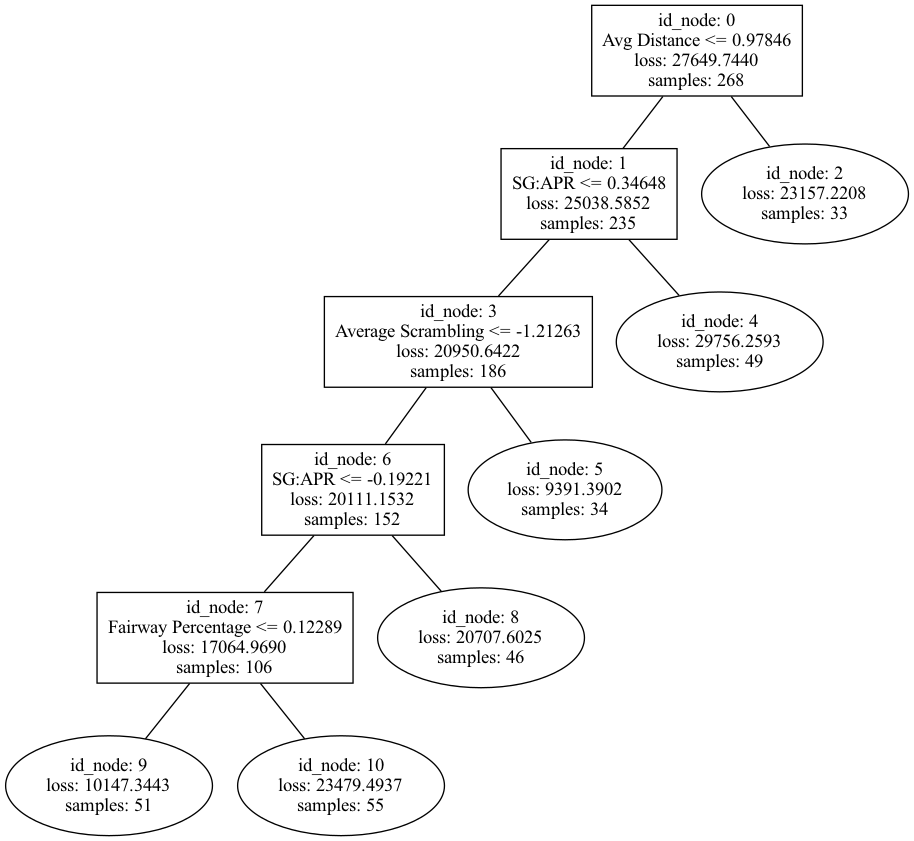

[ 134.59725952  391.54299927 1719.75415039  242.81039429  387.39160156
  352.23831177  111.72949219  368.57928467  142.16549683  209.8548584
  335.20639038  648.61175537   48.08514404  281.13891602  344.28997803
  -17.39309692  555.37017822  210.95863342  546.42004395  397.22042847
  318.0524292   555.61981201  288.38824463  579.64172363  551.00891113
  955.49371338  895.17797852  375.92114258  172.016922    257.00003052
  728.99926758  295.90148926  546.27893066  635.203125    108.31959534
  234.41394043  167.2593689   232.89097595  705.82214355  146.739151
  884.36291504  540.08599854  316.83496094  366.85183716  236.21379089
  679.07891846  457.30822754  178.57275391  -44.73028564 1001.04754639
  117.09968567  761.62976074  860.24176025   30.87496948  302.37945557
 1687.95385742  881.30004883  144.49182129  448.91925049  548.32977295
  342.09008789  431.02355957  676.          312.1350708   650.37756348
 1238.32250977  454.11914062]
The model performance for testing set
------------

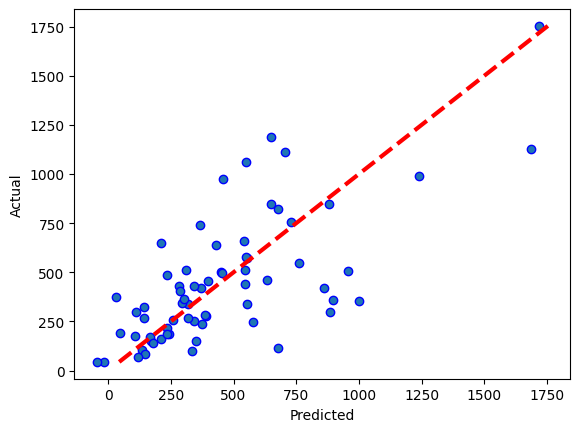

In [304]:
# feature to predict
TARGET = "Points"
# type of data for prediction
prediction_df = per_year_df

X, Y = get_X_Y(prediction_df, target = TARGET)
x_train, x_test, y_train, y_test, val_df = train_test_split_validation(X, Y, scale=True)

model = LinearTreeRegressor(base_estimator=LinearRegression())
model.fit(x_train, y_train)
display(model.plot_model(feature_names=feature_cols))
yhat = model.predict(x_test)
print(yhat)

print(calculate_error(y_test, yhat))
plot_regression(y_test, yhat)

In [314]:
val_df["Pred"] = model.predict(val_df[feature_cols])
print(f"Mean Abs Error using {prediction_df.name} predicting {TARGET}: {mean_absolute_error(val_df[TARGET], val_df['Pred'])}")
val_df

Mean Abs Error using per_year_df predicting Points: 326.58805292159167


,Fairway Percentage,Avg Distance,gir,Average Putts,Average Scrambling,Average SG Putts,SG:OTT,SG:APR,SG:ARG,Points,Pred
Player Name,,,,,,,,,,,
Ian Poulter,0.217827,-0.818135,-0.440164,-1.394616,2.728865,-0.001186,-0.524301,1.333594,2.151979,777.0,659.042603
Jamie Lovemark,-0.970802,1.539900,0.099511,-0.565798,0.587551,-0.123264,0.742861,0.309385,1.064369,787.0,832.509155
Jason Day,-1.089467,2.572945,1.882626,-1.394616,2.132251,1.629429,1.936259,1.039462,1.194166,417.0,1463.879150
Greg Chalmers,-0.504052,-0.896736,-3.182296,-1.645189,-1.556717,2.222381,-1.915281,-3.301608,-0.869158,395.0,194.021652
Keegan Bradley,0.180249,1.281639,0.365702,-0.546523,1.237329,0.664431,1.035283,1.141883,-0.940770,872.0,886.838623
...,...,...,...,...,...,...,...,...,...,...,...
Scott Langley,0.089273,-1.154997,-0.363589,-0.334500,0.304011,-0.021532,-0.434730,-0.024139,0.715260,448.0,648.133789
Robert Garrigus,-1.490950,1.405156,1.332012,0.783440,-1.370644,-0.692962,0.958884,1.627726,-1.173509,1155.0,803.426270
Phil Mickelson,-1.688725,1.068293,-0.287013,-2.030686,0.070682,1.408526,-0.690270,1.286323,0.316918,1373.0,329.988434


## Takeaways

* Average SG Total and Average Score have a **huge** effect on classifier performance
* There are differences in the most important things when predicting different targets

---------------------------------------------------------------------------------------------------------

[1.363169   2.236776   1.4830492  1.9265006  3.3233573  1.2782663
 1.9429165  2.0565355  1.3520527  1.7513413  2.230691   1.6305761
 1.8613889  2.0110006  1.1959442  5.011098   1.5039934  2.2180848
 1.6619945  1.8113073  1.2427745  1.6436423  1.698876   0.78515536
 0.9863183  4.9302554  1.7430661  1.0279952 ]
The model performance for testing set
--------------------------------------
MAE is 1.2138875467436654
MSE is 4.531254082097887
R2 score is -0.01761764547829947
None


/var/folders/5_/2z9ny5950t57nyvwn68j6pg00000gn/T/ipykernel_54649/206637355.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  power_winners_df["Rounds / Win"] = avg_2010_to_2018_df["Rounds"] / avg_2010_to_2018_df["Wins"]


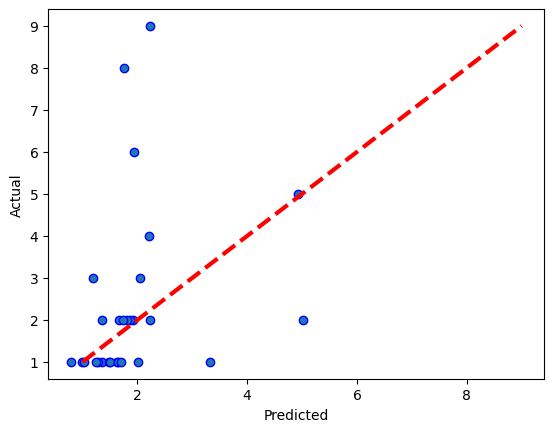

In [279]:
from sklearn.linear_model import RidgeClassifier
from lineartree import LinearBoostRegressor

TARGET = "Wins"

X, Y = get_X_Y(target = TARGET)
x_train, x_test, y_train, y_test, val_df = train_test_split_validation(X, Y, scale=True)

model = LinearBoostRegressor(base_estimator=LinearRegression())
model.fit(x_train, y_train)
# display(model.plot_model(feature_names=feature_cols))
yhat = model.predict(x_test)
print(yhat)

print(calculate_error(y_test, yhat))
plot_regression(y_test, yhat)

In [280]:
val_df["Pred"] = model.predict(val_df[feature_cols])
val_df

,Fairway Percentage,Avg Distance,gir,Average Putts,Average Scrambling,Average SG Putts,SG:OTT,SG:APR,SG:ARG,Wins,Pred
Player Name,,,,,,,,,,,
K.J. Choi,0.794569,-1.401450,-0.448291,-0.174166,0.887402,0.488861,-0.690158,0.161168,1.273565,1.0,1.935636
Ken Duke,1.437228,-1.740056,-0.975566,-0.029103,-0.511353,-1.177883,-0.292786,-0.213967,-0.742248,1.0,1.411255
Mark Wilson,1.439421,-1.572753,0.177662,0.980107,0.764266,-0.701820,-0.764275,-0.479103,0.913898,3.0,1.270215
Peter Malnati,-0.284460,-0.923328,-1.520081,-1.997091,0.955048,1.884852,-1.365400,-1.878248,0.489665,1.0,1.395226
Camilo Villegas,-0.874635,-0.127476,-0.410247,0.017561,-0.274045,-0.433401,-0.868320,0.826552,0.104384,2.0,1.539358
Paul Casey,0.338433,0.618475,1.673293,0.437533,0.706284,0.748317,0.538392,1.999599,-0.182108,1.0,2.180862
Jon Rahm,-0.574990,1.893467,1.777916,-0.280681,0.924498,-0.066373,2.346970,0.525897,0.445210,2.0,9.915016
Jordan Spieth,0.009908,0.202983,0.550183,-2.001149,1.873004,1.211968,0.809460,1.154589,1.540792,10.0,2.229648
Brendan Steele,0.066037,0.789051,0.668676,1.253132,-0.665195,-0.762892,0.582113,0.196490,-0.686184,3.0,1.539933


----

(1, 8)


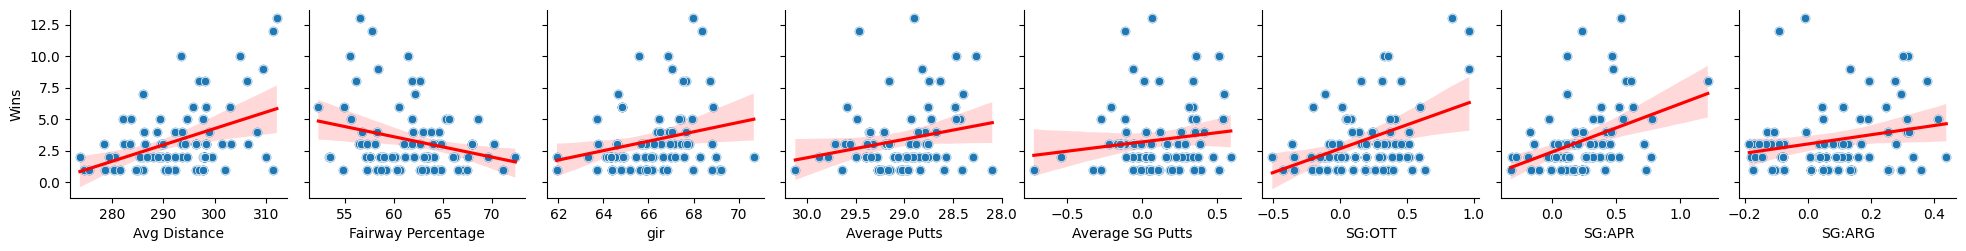

In [107]:
df_to_plot = power_winners_df.drop(columns=["Rounds", "Average Score"])
top_ten_percent  = df_to_plot["Points"].quantile()

df_to_plot = df_to_plot[df_to_plot["Points"] >= top_ten_percent]

graph = sns.pairplot(df_to_plot, kind="reg", plot_kws={'line_kws':{'color':'red'}}, y_vars=["Wins"], x_vars=["Avg Distance", "Fairway Percentage", "gir", "Average Putts", "Average SG Putts", "SG:OTT", "SG:APR", "SG:ARG"])
print(graph.axes.shape)

# Flip x axis for Avg Putts since less putts is better
graph.axes[0][3].invert_xaxis()

# for ax in graph.axes[3]:
#     ax.invert_yaxis() 

# graph.axes[2][3].invert_xaxis()
graph.map(sns.scatterplot)

------

## K-Fold Cross Validation to find best regressor

In [353]:
from sklearn.model_selection import KFold
from sklearn import linear_model
from sklearn.linear_model import SGDRegressor
from sklearn.metrics import accuracy_score
n_outer_folds = 5
kFoldCV = KFold(n_splits=n_outer_folds, shuffle=False)
# feature to predict
TARGET = "Points"
# type of data for prediction
prediction_df = per_year_df

i = 1
all_inner_accuracies = []
regressors = [LinearRegression(), linear_model.Ridge(alpha=.5), SGDRegressor(max_iter=2000)]
for train_index, test_index in kFoldCV.split(prediction_df):
    X, Y = get_X_Y(prediction_df, target = TARGET)
    x_train_outer = X.iloc[train_index]
    X_test = X.iloc[test_index]
    y_train_outer = Y.iloc[train_index]
    y_test_outer = Y.iloc[test_index]


    inner_accuracies = []
    n_inner_folds = 3
    kFoldCvInner = KFold(n_splits=n_inner_folds, shuffle=True, random_state=123)
    for (train_index_inner, test_index_inner), i in zip(kFoldCvInner.split(x_train_outer), range(3)):
        # print(regressors[i])
        regressor = regressors[i]
        model = LinearTreeRegressor(base_estimator=regressor)
        x_train_inner = x_train_outer.iloc[train_index_inner]
        x_test_inner = x_train_outer.iloc[test_index_inner]
        y_train_inner = y_train_outer.iloc[train_index_inner]
        y_test_inner = y_train_outer.iloc[test_index_inner]
        # print(x_test_inner)

        scaler = StandardScaler()
        x_train_inner = scaler.fit_transform(x_train_inner, y_train_inner)
        x_test_inner = scaler.fit_transform(x_test_inner, y_test_inner)

        model.fit(x_train_inner, y_train_inner)
        yhat = model.predict(x_test_inner)
    
        y_test_inner = np.array(list(map(float, y_test_inner[TARGET])))
        inner_accuracies.append((regressor,mean_absolute_error(y_test_inner, yhat)))
       
    
    all_inner_accuracies.append(inner_accuracies)
    # print(f"Accuracy for the fold no. {i} on the test set: {accuracy_score(y_test, model.predict(X_test))}")
    i += 1

all_inner_accuracies

best_inner_accuracies = []
best_inner_regressors = []
for inner_acc in all_inner_accuracies:

    # get the best accuracy and threshold for the inner loop
    reg, acc = sorted(inner_acc, key=lambda x: x[1], reverse=False)[0]
    best_inner_accuracies.append(acc)
    best_inner_regressors.append(reg)

# print(all_inner_accuracies)
# print(best_inner_accuracies)

for i in range(n_outer_folds):
    print(f"Best mean absolute error from outer fold {i + 1} after {n_inner_folds} inner folds:  {round(best_inner_accuracies[i], 4)} using classifier {best_inner_regressors[i]}")
    # TODO: report accuracy as average of outer accuracy scores

print(f"\ntrain error as average of all inner absolute errors: {round(np.mean(best_inner_accuracies), 3)}")

Best mean absolute error from outer fold 1 after 3 inner folds:  185.2412 using classifier LinearRegression()
Best mean absolute error from outer fold 2 after 3 inner folds:  191.9346 using classifier Ridge(alpha=0.5)
Best mean absolute error from outer fold 3 after 3 inner folds:  189.9527 using classifier LinearRegression()
Best mean absolute error from outer fold 4 after 3 inner folds:  195.5556 using classifier LinearRegression()
Best mean absolute error from outer fold 5 after 3 inner folds:  205.6597 using classifier LinearRegression()

train error as average of all inner absolute errors: 193.669
